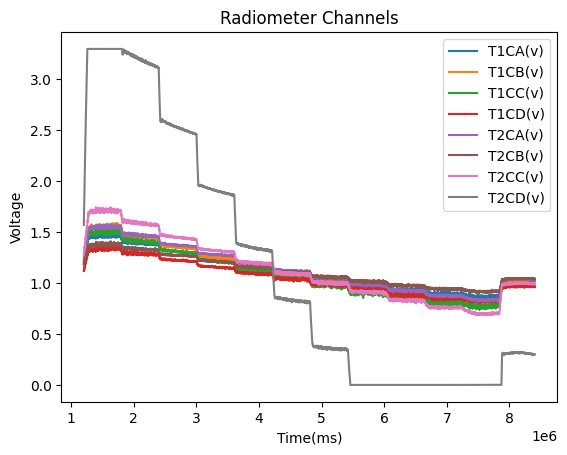

In [146]:
from os import walk
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from scipy.optimize import curve_fit

if __name__ == '__main__':
     file = 'radiometer1_30_5-55_061623_sensor.csv'
     data = pd.read_csv(file)
     channel_col = []
     internal_col = []
     nums = [1,2]
     channels = ['A', 'B', 'C', 'D']
     for num in nums:
          for chan in channels:
               channel_col.append("T" + str(num) + "C" + str(chan) + "(v)")
          internal_col.append("T" + str(num) +"Therm(c)")

     data[data["Time(ms)"] > 1200000].plot(x = "Time(ms)", y = channel_col)
     plt.title("Radiometer Channels")
     plt.ylabel("Voltage")
     plt.show()


Segment the data into different BB temps

In [147]:
#segment the data into the different BB temps
temp_dict = {}
temp_ranges = np.arange(55, 0, -5)
time_interval = 10 #minute length of each trial
lower_bound = 1200000 #time after s
time_interval_ms = 60000 * time_interval #convert minutes to milliseconds
for i in range(0, temp_ranges.size):
    temp_dict[str(temp_ranges[i])] = data[(data["Time(ms)"] > (lower_bound+120000)) & (data["Time(ms)"] < (lower_bound + time_interval_ms-30000))]
    lower_bound += time_interval_ms

Plot the sensor readings at different blackbody temperatures

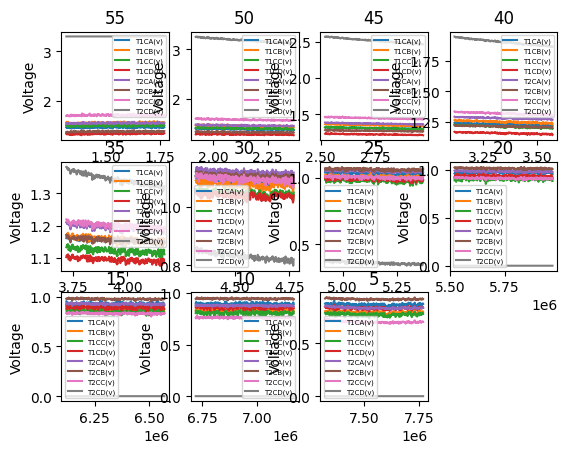

In [148]:
temp_max_min = pd.DataFrame()
temp_plots = plt.figure().tight_layout()
i = 1
for key in temp_dict:
    plt.subplot(3, 4, i)
    plt.plot(temp_dict[key].loc[:,"Time(ms)"], temp_dict[key].loc[:,channel_col])
    plt.title(key)
    plt.ylabel("Voltage")
    plt.legend(channel_col, fontsize = 5)
    i += 1
    max_temp = temp_dict[key].max() 
    max_temp_df = pd.DataFrame({'Max at ' + str(key): max_temp}).T

    min_temp = temp_dict[key].min() 
    min_temp_df = pd.DataFrame({'Min at ' + str(key): min_temp}).T
    temp_max_min= pd.concat([temp_max_min, max_temp_df, min_temp_df]) #transpose

plt.show()

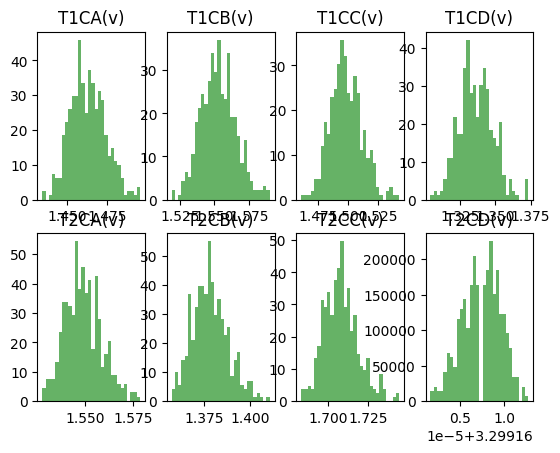

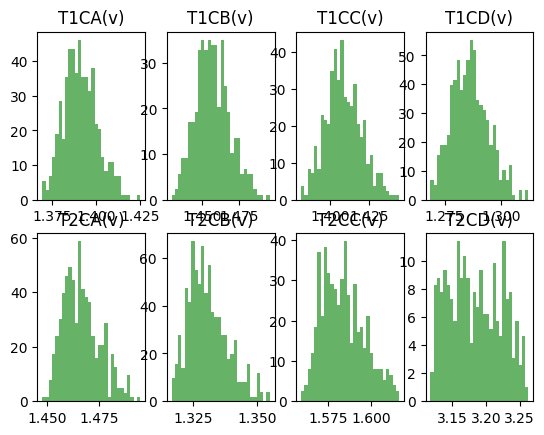

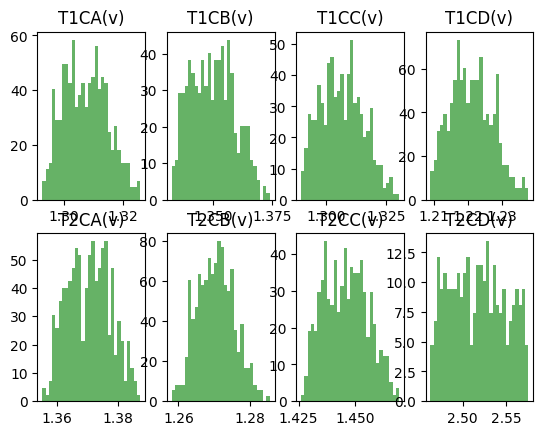

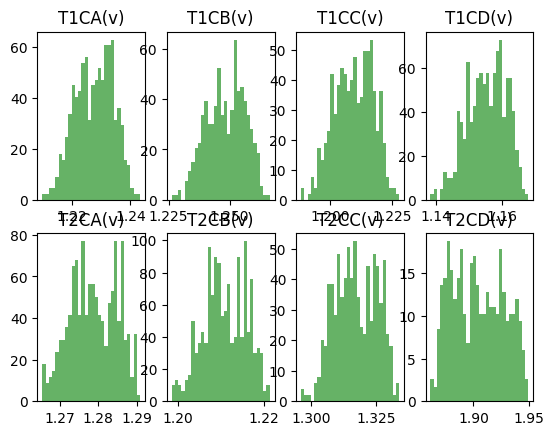

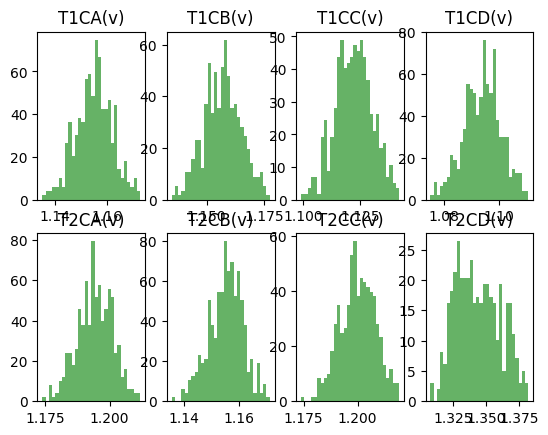

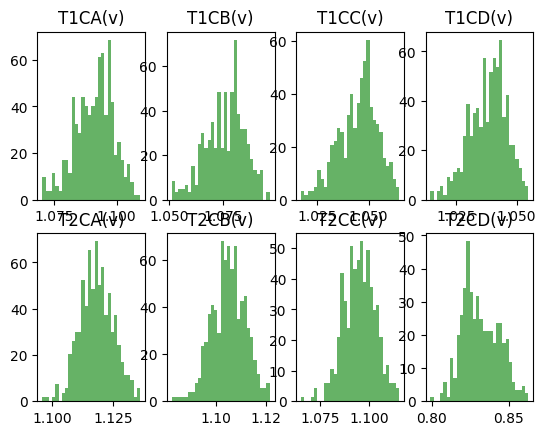

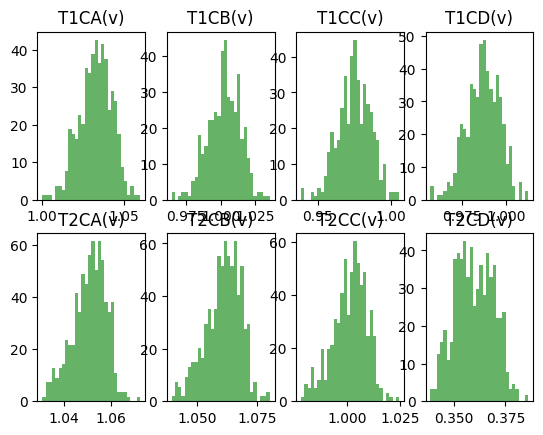

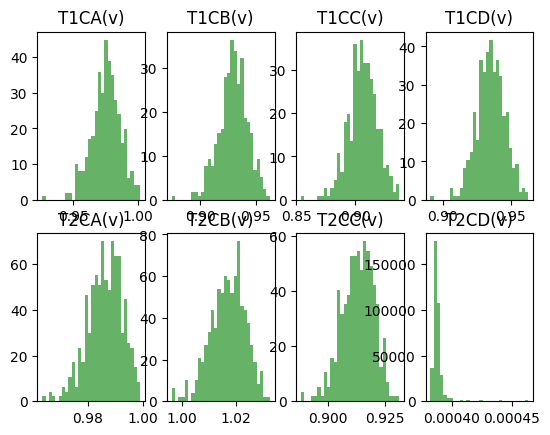

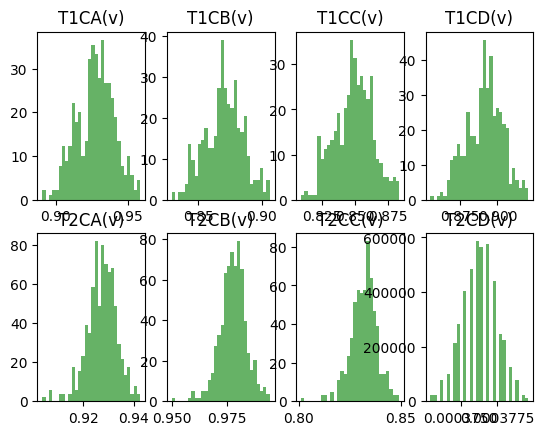

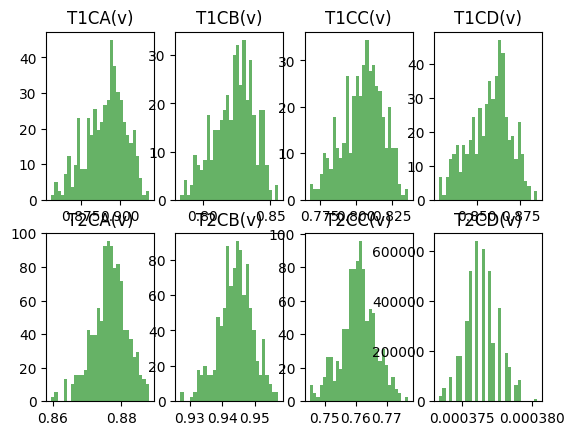

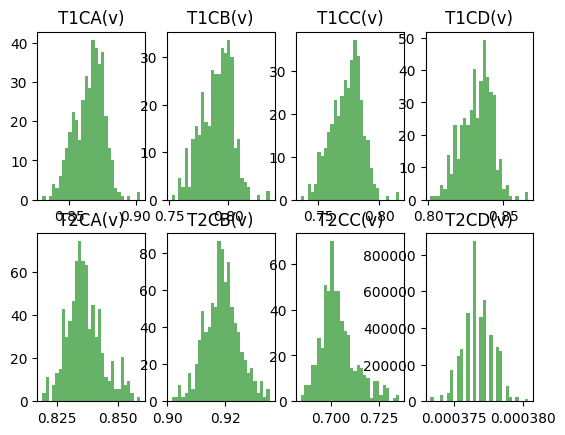

In [149]:
for key in temp_dict:
    plt.figure()
    temp = temp_dict[key]
    i = 1
    for chan in channel_col:
        plt.subplot(2, 4, i)
        plt.hist(temp[chan], bins=30, density=True, alpha=0.6, color='g')
        plt.title(chan)
        i += 1

,Temp,T1CA(v),T1CB(v),T1CC(v),T1CD(v),T2CA(v),T2CB(v),T2CC(v),T2CD(v)
55,55,1.463085,1.552912,1.498237,1.336428,1.549212,1.378172,1.707960,3.299167
50,50,1.391213,1.457394,1.408598,1.286398,1.466683,1.330800,1.583554,3.184314
45,45,1.307343,1.349803,1.306531,1.221129,1.370593,1.270403,1.445899,2.517710
40,40,1.227652,1.248424,1.209764,1.155445,1.278810,1.210935,1.317243,1.904163
35,35,1.155028,1.156905,1.122138,1.093829,1.194366,1.155218,1.200092,1.344161
30,30,1.091032,1.075915,1.044976,1.038214,1.118285,1.105033,1.095105,0.831734
25,25,1.032920,1.002414,0.975113,0.987073,1.050853,1.060837,1.001505,0.359824
20,20,0.975284,0.929928,0.906249,0.935233,0.986267,1.017176,0.913229,0.000388
15,15,0.927714,0.870004,0.849163,0.891381,0.927373,0.977547,0.831998,0.000376
10,10,0.891006,0.823274,0.804792,0.857363,0.876548,0.944130,0.760804,0.000376


,Temp,T1CA(v),T1CB(v),T1CC(v),T1CD(v),T2CA(v),T2CB(v),T2CC(v),T2CD(v)
55,55,0.010817,0.012537,0.013296,0.011950,0.009448,0.009671,0.010804,0.000002
50,50,0.009485,0.011583,0.011405,0.008165,0.008948,0.007634,0.012210,0.038271
45,45,0.007389,0.009077,0.008904,0.006188,0.006944,0.005132,0.009583,0.030869
40,40,0.006486,0.007896,0.007734,0.005928,0.006029,0.004931,0.007936,0.022782
35,35,0.006848,0.008056,0.008136,0.006738,0.006782,0.006201,0.008097,0.016632
30,30,0.007641,0.008991,0.009278,0.007712,0.006832,0.006654,0.008168,0.011970
25,25,0.009792,0.011506,0.011270,0.009361,0.007086,0.007239,0.008020,0.009256
20,20,0.011025,0.012895,0.012350,0.010373,0.006236,0.006377,0.006895,0.000006
15,15,0.012833,0.015016,0.014279,0.012089,0.005888,0.006009,0.006404,0.000001
10,10,0.012500,0.014628,0.013930,0.011803,0.005045,0.005171,0.005571,0.000001


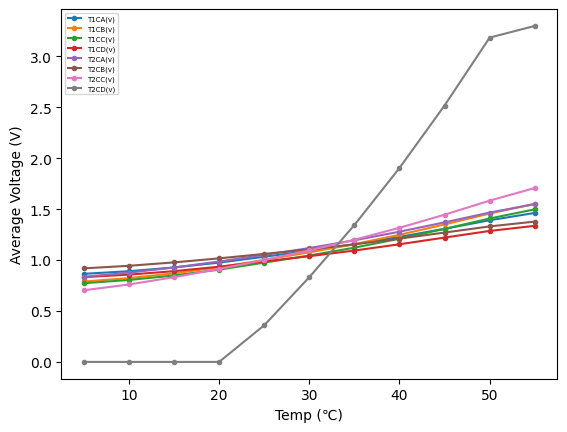

In [150]:
#calculate averages
ch_avgs = pd.DataFrame()
ch_std_dev = pd.DataFrame()
for key in temp_dict:
    temps = temp_dict[key]
    ch_avgs[key] = temps[channel_col].mean()
    ch_std_dev[key] = temps[channel_col].std()
ch_avgs=ch_avgs.T
ch_avgs.insert(loc = 0,
          column = 'Temp',
          value = temp_ranges)
ch_std_dev =ch_std_dev.T
ch_std_dev.insert(loc = 0,
          column = 'Temp',
          value = temp_ranges)

plt.plot(ch_avgs.loc[:,"Temp"], ch_avgs.loc[:,channel_col], marker = '.')
plt.legend(channel_col, fontsize = 5)
plt.xlabel("Temp (\N{DEGREE CELSIUS})")
plt.ylabel("Average Voltage (V)")
display(ch_avgs)
display(ch_std_dev)

In [155]:
#PLanck Radiance
def planck_radiance(wavelength, temperature):
    h = 6.62607015e-34  # Planck's constant
    c = 299792458  # Speed of light
    k = 1.38064852e-23  # Boltzmann constant

    numerator = 2 * h * c ** 2
    denominator = wavelength ** 5 * (np.exp((h * c) / (wavelength * k * temperature)) - 1)
    radiance = numerator / denominator
    return radiance

def linear_fit(x, slope , b):
    return slope * x + b

def quadratic_fit(x, a, b, c):
    return a * (x ** 2) + b * x + c

def gaussian_fit(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

{'T1CA(v)': array([52.9072517 ,  1.46715138,  0.33353118]), 'T1CB(v)': array([52.93032858,  1.55298554,  0.42266555]), 'T1CC(v)': array([52.90907358,  1.49911625,  0.40228678]), 'T1CD(v)': array([53.17741006,  1.36477487, -0.29087905]), 'T2CA(v)': array([53.01457246,  1.56304036,  0.39462755]), 'T2CB(v)': array([53.06265872,  1.39722381, -0.25959724]), 'T2CC(v)': array([53.01798993,  1.71397792,  0.54857907]), 'T2CD(v)': array([51.73164392,  3.31189894, -2.10289143])}


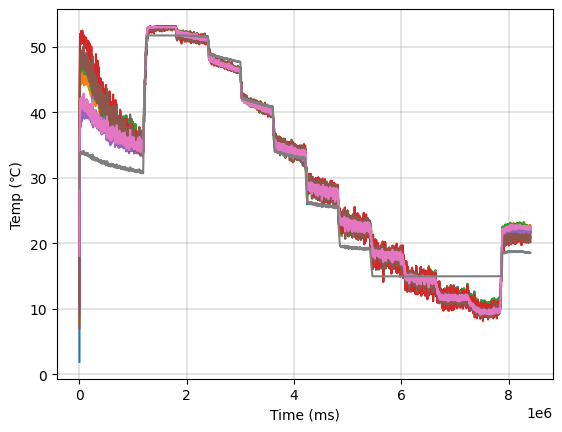

In [159]:
#obtain curves for data
temp_popt = {}
temp_pcov = {}
plt.figure()
for chan in channel_col:
    temp_popt[chan], temp_pcov[chan] = curve_fit(linear_fit, ch_avgs[chan], ch_avgs["Temp"])
    plt.plot(data["Time(ms)"], linear_fit(data[chan], *temp_popt[chan]))
    plt.xlabel("Time (ms)")
    plt.ylabel("Temp (\N{DEGREE CELSIUS})")

print(temp_popt)
plt.grid(color='gray', linestyle='-', linewidth=0.3)
#plt.plot(data["Time(ms)"], linear_fit(data["T2CD(v)"], *temp_popt["T2CD(v)"]))
#plt.plot(data["T1CB(v)"], linear_fit(data["T1CB(v)"], *temp_popt["T1CB(v)"]))

Text(0, 0.5, 'Noise ')

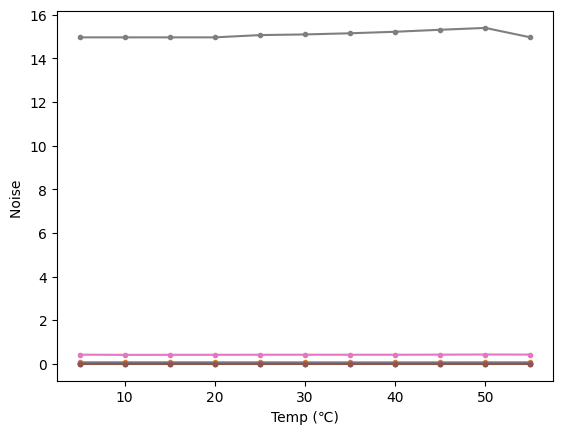

In [165]:
#Plot noise in temperature domain
temp_popt = {}
temp_pcov = {}
plt.figure()
for chan in channel_col:
    temp_popt[chan], temp_pcov[chan] = curve_fit(linear_fit, ch_avgs[chan], ch_avgs["Temp"])
    noise = linear_fit(ch_std_dev[chan], *temp_popt[chan] )

    plt.plot(ch_avgs["Temp"], noise, marker = '.')
    #plt.xlabel("Time (ms)")
plt.xlabel("Temp (\N{DEGREE CELSIUS})")
plt.ylabel("Noise ")

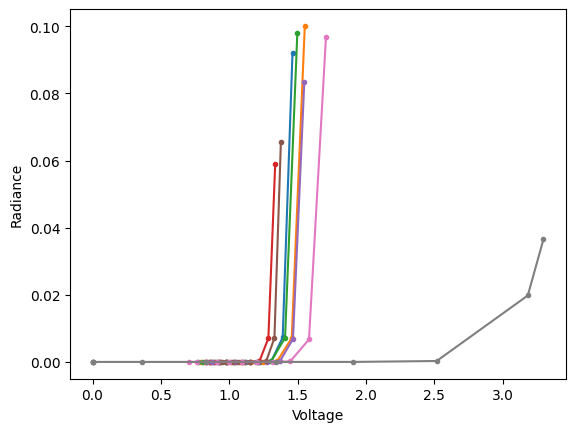

In [168]:
wavelength = 11e-6 #wavelength in microns
plt.figure()
for chan in channel_col:
    temp_popt[chan], temp_pcov[chan] = curve_fit(linear_fit, ch_avgs[chan], ch_avgs["Temp"])

    calc_temp = linear_fit(ch_avgs[chan], *temp_popt[chan] )
    calc_radiance = [planck_radiance(wavelength, temp) for temp in calc_temp]
    plt.plot(ch_avgs[chan], calc_radiance, marker = '.')
    plt.xlabel("Voltage")
    plt.ylabel("Radiance")

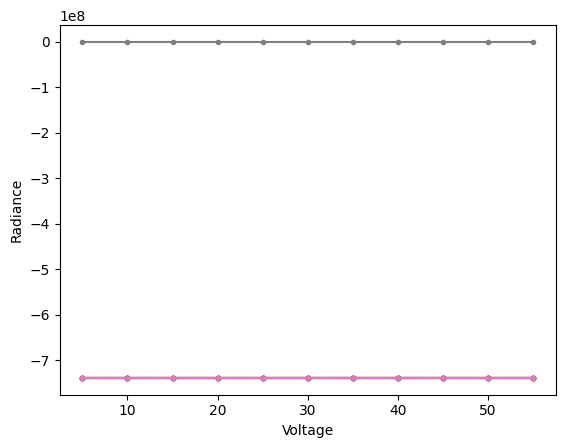

In [170]:
#plot noise
wavelength = 11e-6 #wavelength in microns
plt.figure()
for chan in channel_col:
    temp_popt[chan], temp_pcov[chan] = curve_fit(linear_fit, ch_avgs[chan], ch_avgs["Temp"])

    calc_temp = linear_fit(ch_std_dev[chan], *temp_popt[chan] )
    calc_radiance = [planck_radiance(wavelength, temp) for temp in calc_temp]
    plt.plot(ch_avgs["Temp"], calc_radiance, marker = '.')
    plt.xlabel("Voltage")
    plt.ylabel("Radiance Noise")